In [1]:
import requests

In [2]:
resp = requests.request("get", "http://www.google.com/search?q=python", headers=agent)

In [4]:
agent={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"}

In [5]:
resp = requests.request("get", "http://www.google.com/search?q=python", headers=agent)

In [10]:
resp.status_code, resp.reason, resp.headers, resp.request.headers

(200,
 'OK',
 {'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Tue, 05 Mar 2019 13:06:16 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Strict-Transport-Security': 'max-age=31536000', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '1; mode=block', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2019-03-05-13; expires=Thu, 04-Apr-2019 13:06:16 GMT; path=/; domain=.google.com, NID=162=OAzzW2akpNfqsxuk9yUdsyJqVPWAL2Fx2YlMkYd8zctHP8MfBU7Eg_Ep9tXAOoWkJAlbs5BztDsI86v60qJEd1-XHwTenZ2lWL3nTrJPyI1DFf0K8Lmtc5BzcROabO3RBCAckwXbAUTVox0AQt0BTwEUG0YdrUo1TAq6UokG3Y8; expires=Wed, 04-Sep-2019 13:06:16 GMT; path=/; domain=.google.com; HttpOnly', 'Alt-Svc': 'quic=":443"; ma=2592000; v="44,43,39"', 'Transfer-Encoding': 'chunked'},
 {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36', 'Accept-Encoding': 'gzip,

In [12]:
# type(resp.content), resp.content.decode('utf-8'), type(resp.text)
resp.encoding="utf-8"

In [14]:
resp = requests.request("get", "http://www.google.com/search?q=파이썬", headers=agent)

In [15]:
resp.url

'https://www.google.com/search?q=%ED%8C%8C%EC%9D%B4%EC%8D%AC&gws_rd=ssl'

In [17]:
resp = requests.request("get", "http://www.google.com/search",params={"q":"파이썬"}, headers=agent)

In [20]:
resp.status_code

200

In [21]:
def download(url, param, retries=3):
    resp = None
    
    try:
        resp = requests.get(url, params=param, headers=agent)
        resp.raise_for_status()
        
    except request.exceptions.HTTPError as e:
        if 500 <= e.code < 600 and retries > 0 :
            return download(url, param, retries-1)
        else:
            print(e.code)
            print(e.reason)
            print(e.headers)
            print(e.request.headers)
            
    return resp

In [22]:
html = download("http://www.google.com/search",{"q":"파이썬"})

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>파이썬 - Google 검색</title><script nonce="0c2XEsab7T0oVwFiV1J7MA==">(function(){window.google={kEI:\'OXd-XOeaCoLk-AaprK2gDw\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_OXd-XOeaCoLk-AaprK2gDw\',kGL:\'KR\'};google.kHL=\'ko\';})();google.time=function(){return(new Date).getTime()};(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)){b=new Image;var d=google.lc,f=google.li;d[f]=b;b.on
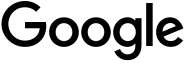
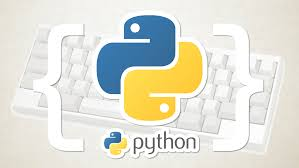
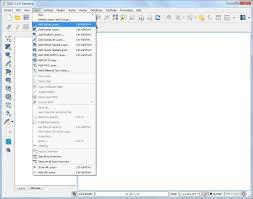
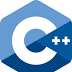

In [23]:
html.text

In [24]:
def download(method, url, param, retries=3):
    resp = None
    
    try:
        resp = requests.request(method, url, params=param, headers=agent)
        resp.raise_for_status()
        
    except request.exceptions.HTTPError as e:
        if 500 <= e.code < 600 and retries > 0 :
            return download(method, url, param, retries-1)
        else:
            print(e.code)
            print(e.reason)
            print(e.headers)
            print(e.request.headers)
            
    return resp

In [25]:
html = download("get", "http://httpbin.org/get", {"q":"파이썬"})

In [26]:
html.text

'{\n  "args": {\n    "q": "\\ud30c\\uc774\\uc36c"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"\n  }, \n  "origin": "211.36.133.142, 211.36.133.142", \n  "url": "https://httpbin.org/get?q=\\ud30c\\uc774\\uc36c"\n}\n'